# Facial Expressions Recognition

We are going to write a python script to train a custom supervised machine learning model using Tensorflow and Keras that will be able to recognize the emotions of a face.

data info:
* emotion -> type of picture like angry or sad etc..
* pixels -> resmin pixelleri
* usage -> ne için kullanacak, test yada trainig


epoch ->number of steps our program will nun in each proccess

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [0]:
#local olarak veriyi dahil ederken
#raw_data_csv_file_name = 'fer2013/fer2013.csv'

#google colab kullnırken
raw_data = pd.read_csv('/content/drive/My Drive/fer2013/fer2013.csv')

In [0]:
#raw_data = pd.read_csv(raw_data_csv_file_name)

In [6]:
raw_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [43]:
raw_data['emotion'].count()

35887

In [0]:
piksel_uzunlugu = len(raw_data['pixels'][0].split(' '))

In [45]:

print(piksel_uzunlugu)


2304


In [11]:
# training sütünü kaç tane eğitim için kaç tanesi ise test için kullanacak

raw_data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

Nice, it looks like the data is already split for testing.
Let’s transform the input pixels to see how the first image looks.

yukarıda gördüğümüz gibi verilerimizi hem test hem de trainig olarak bölündü
bundan ilk pixselin nasıl bir resim olduğunu bakalım

In [0]:
# ilk resmin pikseli
#raw_data['pixels'][1]

In [0]:
img = raw_data['pixels'][3]
val_sep = img.split(' ')
x_pixels = np.array(val_sep, 'float32')

In [0]:
# bir resim 0-255 arasında olduğu için her değerimizi 255 bölüp 
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)

http://csfieldguide.org.nz/en/interactives/pixel-viewer/index.html

In [0]:
# Önemli olan kütüphanleri import edelim

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

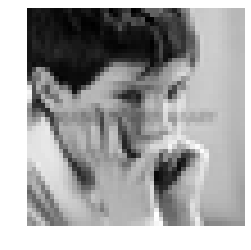

In [16]:
plt.imshow(x_reshaped,cmap='gray',interpolation='nearest')
plt.axis("off")
plt.show()

In [17]:
![image](toface.png)

/bin/bash: -c: line 0: syntax error near unexpected token `toface.png'
/bin/bash: -c: line 0: `[image](toface.png)'


In [0]:
from IPython.display import Image

In [0]:
#Image(filename='toface.png',width=600,height=600)

#  training and testing the model

In [0]:
import tensorflow as tf

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

Using TensorFlow backend.


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [24]:
raw_data.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [0]:
#bizim model boyunca kullanacağımız değişkenleri tanımlayalım
#çıktığımız(output) yedi tane sınıftan oluşacağından 

num_class = 7

# her resim 0-255 arasında oluştuğundan piksellerimizi sonradan bölüceğımız sayı
batch_size = 256

#modelin eğitirken epoch sayısı (kaç adımla programımız çalışacak)

epochs = 25

In [0]:
#initialize trainset and test set
X_train, y_train, X_test, y_test = [], [], [], []

In [27]:
# sutunları bulup sahip olduğu verileri bir değişkene atama ve değer miktarlarını da öğrenmek için 
#with open("/content/drive/My Drive/fer2013/fer2013.csv") as f:
#   content = f.readlines()

# lines = np.array(content)

# num_of_instances = lines.size
# print("number of instances: ",num_of_instances)
# print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [28]:
lines[1]

'0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 

In [0]:
# # veriyi ayırma birinci yolu
# for i in range(1,num_of_instances):
#     #try:
#       emotion, img, usage = lines[i].split(",")
          
#       val = img.split(" ")
      
            
#       pixels = np.array(val, 'float32')
#       print(pixels)
        
#       emotion = keras.utils.to_categorical(emotion, num_class)
    
#       if 'Training' in usage:
#         print(usage)
#         y_train.append(emotion)
#         X_train.append(pixels)
#       elif 'PublicTest' in usage:
#         y_test.append(emotion)
        
#         X_test.append(pixels)
#       else:
#         pass
# #     except:
# #       print("", end="")

In [0]:
# X_test

In [53]:
X_train

[]

In [0]:
# kullanacağımız veriyi training ve test olarak ayırmanın 2. adım

satun = raw_data['emotion'].count()
for i in range(1,satun):
    try:
#       print(i)
        #burada image(pixels) sayi olarak(bites) olarak verildi
  
      img = raw_data['pixels'][i]
      val_sep = img.split(' ')
      x_pixels = np.array(val_sep, 'float32')
      emotion = keras.utils.to_categorical(raw_data['emotion'][i], num_class)
      
#       category = raw_data['Usage'][i]
#       print(catX-egory)
    
      if raw_data['Usage'][i]=='Training':
        y_train.append(raw_data['emotion'][i])
        X_train.append(x_pixels)
          
      elif raw_data['Usage'][i]=='PublicTest':
        y_test.append(raw_data['emotion'][i])
        X_test.append(x_pixels)
      else:
        pass
    except:
      print("", end="")

In [58]:
X_train[2]

array([ 24.,  32.,  36., ..., 142., 143., 142.], dtype=float32)

In [59]:
X_test[2]

array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32)

In [75]:
#data transformation for train and test sets

# verileri sadece değer olarak test ve train değişkenlerde tutalım
# bu değişkenler aynı zamanda bir numpy array olduğunu belirtelim ki sonra sayı olarak kullanmak istediğimizi hat vermesin

X_train = np.array(X_train,'float32')
X_test = np.array(X_test,'float32')
y_train = np.array(y_train,'float32')
y_test = np.array(y_test,'float32')

#veriyi normalızasyon haline dönüştürelim çünkü bir resim 0-255 arasında bi değer sahip ve sayıyı(256) bölelim ki [0, 1] arasında bir değer bulalım
X_train /= 255 
X_test /= 255

# şimdiki verimiz bir satir şeklindedir ama bunun yerine matris olarak dönütürelim

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape, ' train verinin örneği')
print(X_test.shape, ' test verinin örneği')


(57416, 48, 48, 1)  train verinin örneği
(7178, 48, 48, 1)  test verinin örneği


In [81]:
X_train.view()[2]

array([[[8.7291143e-14],
        [1.1638821e-13],
        [1.3093672e-13],
        ...,
        [6.2922362e-13],
        [6.2558650e-13],
        [6.2922362e-13]],

       [[9.0928275e-14],
        [1.2366245e-13],
        [1.0547679e-13],
        ...,
        [6.2922362e-13],
        [6.2558650e-13],
        [6.2922362e-13]],

       [[9.4565394e-14],
        [1.0547679e-13],
        [9.0928275e-14],
        ...,
        [6.2558650e-13],
        [6.2558650e-13],
        [6.3286073e-13]],

       ...,

       [[5.7830379e-13],
        [6.7286915e-13],
        [5.7102955e-13],
        ...,
        [5.7102955e-13],
        [5.6739243e-13],
        [5.5648108e-13]],

       [[4.9464979e-13],
        [5.7102955e-13],
        [6.8014339e-13],
        ...,
        [5.5284396e-13],
        [5.5284396e-13],
        [5.4556967e-13]],

       [[5.2738402e-13],
        [4.7282707e-13],
        [5.8557808e-13],
        ...,
        [5.1647261e-13],
        [5.2010973e-13],
        [5.1647261e-13]]